# Data Science Coding Test 

The test is designed to be completed in 4 hours, which is also the deadline. There are two problems to be completed, each with multiple parts. The main evaluation criteria are accuracy and completeness: please try to do as many tasks as possible within the allocated time. 

You can use either __R__ or __Python__ and you MUST deliver all the codes, accompanied by estimation results and graphs/tables required in this test in the format of your choice. You can leverage any packages that you find useful for the accomplishment of the test.

## Problem 1

Use file __“mortgages.csv”__ and __“macros.csv”__ for this exercise. The brief description of the variables are given in the table below. The two datasets have a panel and time-series structure, respectively.

__mortgages.csv__

Column | Type | Description
:---|:---|:---
`loan_id` | Numeric | The unique ID assigned to every loan application.
`time` | Numeric| Observation month in elapsed time format (# of months since 1960-Jan)
`obs_month` | Numeric | Observation month in YYYYMM format
`orig_date` | Date | Loan origination date
`orig_date_elapsed` | Numeric | Loan origination date in elapsed time format (# of months since 1960-Jan)
`maturity_date` | Date | Loan maturity date
`occupancy` | Categorical | Occupancy type of the collateral
`mortgage_type` | Categorical | Mortgage type
`arrears` | Numeric | Number of months a loan is in arrears
`current_balance` | Numeric | Current outstanding balance of the loan
`current_ltv` | Numeric | Current loan-to-value ratio
`credit_score` | Numeric | Origination credit score of the borrower
`original_ltv` | Numeric | Origination loan-to-value ratio (LTV)
`hpi_o` | Numeric | House price index at loan origination date
`interest_rate_o` | Numeric | Mortgage rate at loan origination date

__macros.csv__

Column | Type | Description
:---|:---|:---
`hpi_t` | Numeric | House price index at current date
`interest_rate_t` | Numeric | Mortgage rate at current date
`gdp_t` | Numeric | GDP annual growth rate at current date

1. __How many observations and how many loans (*loan_id*) are there in the dataset? What is the time coverage (start and end dates) in terms of observation month, origination date and the maturity date?__

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('mortgages.csv')
num_obs = df.shape[0]

In [3]:
print(f'The number of all the observations is: {num_obs}')

The number of all the observations is: 61583


In [4]:
loan_ids = df['loan_id'].unique()
loan_ids_count = loan_ids.shape[0]
print(f'The number of unique loan ids in the dataset is: {loan_ids_count}')

The number of unique loan ids in the dataset is: 5000


In [5]:
start_obs = df['orig_date']
max_val = start_obs.max()
min_val = start_obs.min()
print(f'Start date for origination date is: {min_val}, where format is YYYYMM')
print(f'End date for origination date is: {max_val}, where format is YYYYMM')
print('')
start_obs1 = df['obs_month']


max_val1 = start_obs1.max()
min_val1 = start_obs1.min()
print(f'Start date for observation month is: {min_val1}, where format is YYYYMM')
print(f'End date for observation month is: {max_val1}, where format is YYYYMM')
print('')
start_obs2 = df['obs_month']
max_val2 = start_obs2.max()
min_val2 = start_obs2.min()
print(f'Start date for maturity rate is: {min_val2}, where format is YYYYMM')
print(f'End date for maturity rate is: {max_val2}, where format is YYYYMM')

Start date for origination date is: 201011, where format is YYYYMM
End date for origination date is: 201902, where format is YYYYMM

Start date for observation month is: 201404, where format is YYYYMM
End date for observation month is: 201903, where format is YYYYMM

Start date for maturity rate is: 201404, where format is YYYYMM
End date for maturity rate is: 201903, where format is YYYYMM


2. __Create a table reporting the number of loans and percentage of loans per month. Create a distribution plot (bar plot) showing the number of loans at each observation date in the dataset.__

In [6]:
df['obs_month'] = pd.to_datetime(df['obs_month'], format='%Y%m')
df = df.set_index('obs_month')
df['month'] = df.index.month
df

,loan_id,time,orig_date,orig_date_elapsed,maturity_date,occupancy,mortgage_type,arrears,current_balance,current_ltv,credit_score,original_ltv,hpi_o,interest_rate_o,month
obs_month,,,,,,,,,,,,,,,
2016-04-01,1,675,201308,643,202308,holiday home,NaN,0,41303.42,24.498336,715.0,69.4,87.03,9.20,4
2016-05-01,1,676,201308,643,202308,holiday home,bullet,0,41061.95,24.483867,715.0,69.4,87.03,9.20,5
2016-06-01,1,677,201308,643,202308,btl,erm,0,40804.42,24.626795,715.0,69.4,87.03,9.20,6
2016-07-01,1,678,201308,643,202308,btl,erm,0,40483.89,24.735883,715.0,69.4,87.03,9.20,7
2016-08-01,1,679,201308,643,202308,NaN,linear,0,40367.06,24.925476,715.0,69.4,87.03,9.20,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-01,49999,706,201508,667,202812,btl,erm,0,265013.60,45.586335,779.0,60.0,179.45,1.75,11
2018-12-01,49999,707,201508,667,202812,holiday home,bullet,0,263608.64,43.947018,NaN,60.0,179.45,1.75,12
2019-01-01,49999,708,201508,667,202812,holiday home,bullet,0,262187.35,43.438579,779.0,60.0,179.45,1.75,1


In [7]:
df2 = df.groupby(['month'])['month'].count()
# df2 = df2.reset_index()
df3 = df2 / num_obs *100

df3 = pd.DataFrame(df3)
df3 = df3.rename(columns={"month": "Percent"})
df3


,Percent
month,
1,8.533199
2,8.495851
3,8.614390
4,7.675820
5,7.532923
6,7.685563
7,8.177581
8,8.348083
9,8.781644


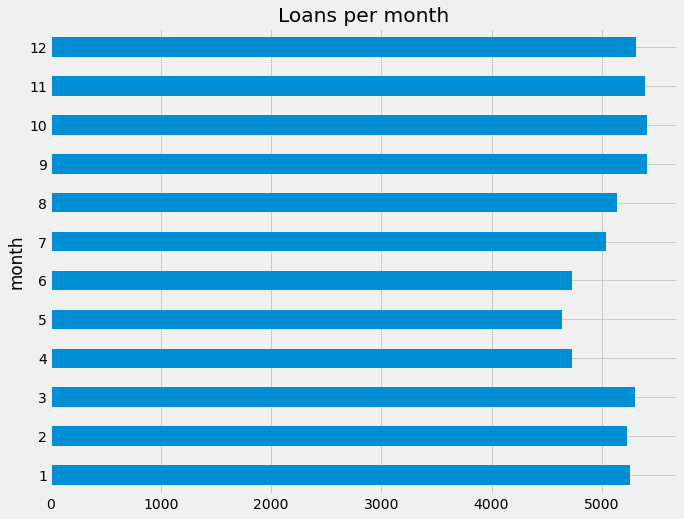

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

plt.figure(figsize=(10,8))
df2.plot(kind='barh', title='Loans per month')
plt.show()

3. __Create a table reporting the number and share of observations per vintage (origination year) using the variable _orig_date_. Create a distribution plot (bar plot) showing the number of loans at each vintage in the dataset__

In [9]:
df['year'] = df.index.year
df4 = df.groupby(['year'])['year'].count()
df4 = pd.DataFrame(df4)
df4 = df4.rename(columns={"year": "Number of loans"})
df4

,Number of loans
year,
2014,653
2015,4343
2016,25185
2017,17841
2018,11111
2019,2450


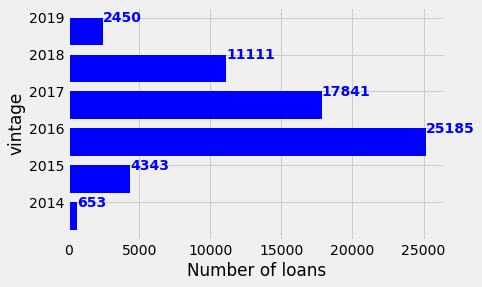

In [10]:
x = [u'2014', u'2015', u'2016', u'2017', u'2018', u'2019']
y = [653, 4343, 25185, 17841, 11111, 2450]

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.xlabel('Number of loans')
plt.ylabel('vintage')      
plt.show()

4. __Create a new variable called “*first_obs*” that is the first observation date of each account. Create and summarize the observation lag (difference between the origination date and the first observation date) in the dataset.__

5. __Merge the macro variables (*interest_rate_t, hpi_t, gdp_t*) provided in the macro.csv file with the mortgages.csv file, using the variable *obs_month*.__

In [11]:
macro = pd.read_csv('macros.csv')
# matching the format
macro['date'] = pd.to_datetime(macro['date'], format='%Y%m')
# Using inner join
merged_df = pd.merge(left=df, right=macro, left_on='obs_month', right_on='date')
merged_df.shape


(61583, 20)

6. __In credit risk vocabulary, a loan that is late on repayments is said to be in arrears, measured in months of non-payment. Using the dataset created in step 5, create an indicator variable (*default_flag*) taking the value of 1 when a loan becomes 3 or more months in arrears, and zero otherwise. The variable “arrears” indicates the number of months in arrears.__

In [12]:
# merged_df.head()

# Create an default_flag column using 1s and 0s (1 if becomes 3 or more)
merged_df['default_flag'] = np.where(merged_df['arrears'] >= 3, 1, 0)
merged_df.head()

,loan_id,time,orig_date,orig_date_elapsed,maturity_date,occupancy,mortgage_type,arrears,current_balance,current_ltv,...,original_ltv,hpi_o,interest_rate_o,month,year,date,interest_rate_t,hpi_t,gdp_t,default_flag
0,1,675,201308,643,202308,holiday home,NaN,0,41303.42,24.498336,...,69.4,87.03,9.200,4,2016,2016-04-01,9.2,226.29,2.899137,0
1,15,675,201509,668,202509,btl,erm,0,153051.03,77.556076,...,95.0,186.91,8.180,4,2016,2016-04-01,9.2,226.29,2.899137,0
2,28,675,201509,668,202510,btl,erm,0,109660.66,69.674631,...,85.0,186.91,9.280,4,2016,2016-04-01,9.2,226.29,2.899137,0
3,32,675,201510,669,202510,owner occupied,linear,2,238081.62,NaN,...,80.0,191.42,6.710,4,2016,2016-04-01,9.2,226.29,2.899137,0
4,33,675,201510,669,202510,owner occupied,linear,1,103300.75,62.416209,...,75.0,191.42,5.755,4,2016,2016-04-01,9.2,226.29,2.899137,0


7. __Create a single table reporting the summary statistics (mean, median, std, min and max) of the *default flag, current balance, current LTV, borrower credit score, original LTV, house price index at origination and the current house price index*, where each row of the table reports the statistics for one variable. Add a column to the table, reporting the number of missing observations for each variable__

In [13]:
summ = merged_df[['default_flag','current_balance','current_ltv','credit_score','original_ltv','hpi_o','hpi_t']]
summary_df = summ.describe().T
# summary_df = summ.describe()
summary_df

,count,mean,std,min,25%,50%,75%,max
default_flag,61583.0,0.025413,0.157377,0.00,0.000000,0.000000,0.0000,1.000000e+00
current_balance,61583.0,246831.006319,205304.031841,0.00,103111.930000,183479.950000,343463.4700,3.106990e+06
current_ltv,59726.0,83.382373,28.213847,0.00,67.303584,82.213709,100.9045,8.035135e+02
credit_score,57773.0,673.111332,71.455942,428.00,626.000000,679.000000,727.0000,8.250000e+02
original_ltv,61583.0,78.956608,10.045188,50.10,75.000000,80.000000,80.0000,1.502000e+02
hpi_o,61583.0,197.962771,34.427484,76.47,180.070000,216.770000,222.3900,2.262900e+02
hpi_t,61583.0,184.386381,27.709500,107.83,158.600000,180.520000,212.7300,2.262900e+02


Add a column to the table, reporting the number of missing observations for each variable

In [14]:
summary_df['NaNs'] = summ.isna().sum()
summary_df = summary_df.round(decimals = 2)
summary_df = summary_df.drop(['25%'], axis=1)
summary_df = summary_df.drop(['50%'], axis=1)
summary_df = summary_df.drop(['75%'], axis=1)
summary_df

,count,mean,std,min,max,NaNs
default_flag,61583.0,0.03,0.16,0.00,1.00,0
current_balance,61583.0,246831.01,205304.03,0.00,3106990.05,0
current_ltv,59726.0,83.38,28.21,0.00,803.51,1857
credit_score,57773.0,673.11,71.46,428.00,825.00,3810
original_ltv,61583.0,78.96,10.05,50.10,150.20,0
hpi_o,61583.0,197.96,34.43,76.47,226.29,0
hpi_t,61583.0,184.39,27.71,107.83,226.29,0


8. __Tabulate the variables: *arrears, mortgage_type and occupancy* to show the number and the percentage of observations in each category of these variables__

In [15]:
df_tab1 = df.groupby(['arrears'])['arrears'].count()
df_tab2 = df.groupby(['mortgage_type'])['mortgage_type'].count()
df_tab3 = df.groupby(['occupancy'])['occupancy'].count()

In [16]:
df_tab1 = pd.DataFrame(df_tab1)
df_tab1 = df_tab1.rename(columns={"arrears": "Count"})
# Sum the rows of DataFrame
df_tab1.loc['Total']= df_tab1.sum()
df_tab1['Percent'] = df_tab1 / 61583 *100
df_tab1

,Count,Percent
arrears,,
0,52124,84.640242
1,5523,8.968384
2,2371,3.850088
3,1538,2.497442
4,27,0.043843
Total,61583,100.000000


In [17]:
df_tab2 = pd.DataFrame(df_tab2)
df_tab2 = df_tab2.rename(columns={"mortgage_type": "Count"})
# Sum the rows of DataFrame
df_tab2.loc['Total']= df_tab2.sum()
df_tab2['Percent'] = df_tab2 / 55465 *100
df_tab2

,Count,Percent
mortgage_type,,
bullet,19958,35.983052
erm,17326,31.237717
linear,18181,32.779230
Total,55465,100.000000


In [18]:
df_tab3 = pd.DataFrame(df_tab3)
df_tab3 = df_tab3.rename(columns={"moccupancy": "Count"})
# Sum the rows of DataFrame
df_tab3.loc['Total']= df_tab3.sum()
df_tab3['Percent'] = df_tab3 / 53404 *100
df_tab3

,occupancy,Percent
occupancy,,
btl,12296,23.024493
holiday home,27996,52.423039
owner occupied,13112,24.552468
Total,53404,100.000000


9. __Based on the findings in points 7 and 8, make the corresponding treatments of missing values (e.g. imputation, drop).__

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61583 entries, 0 to 61582
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   loan_id            61583 non-null  int64         
 1   time               61583 non-null  int64         
 2   orig_date          61583 non-null  int64         
 3   orig_date_elapsed  61583 non-null  int64         
 4   maturity_date      61583 non-null  int64         
 5   occupancy          53404 non-null  object        
 6   mortgage_type      55465 non-null  object        
 7   arrears            61583 non-null  int64         
 8   current_balance    61583 non-null  float64       
 9   current_ltv        59726 non-null  float64       
 10  credit_score       57773 non-null  float64       
 11  original_ltv       61583 non-null  float64       
 12  hpi_o              61583 non-null  float64       
 13  interest_rate_o    61583 non-null  float64       
 14  month 

In [20]:
#  imputation: 'credit_score', 'current_ltv', 

merged_df['credit_score'] = merged_df['credit_score'].fillna(merged_df['credit_score'].mean())
merged_df['current_ltv'] = merged_df['current_ltv'].fillna(merged_df['current_ltv'].mean())

#  dropping - 'mortgage_type', 'occupancy' 

filtered_df = merged_df.dropna()

filtered_df

,loan_id,time,orig_date,orig_date_elapsed,maturity_date,occupancy,mortgage_type,arrears,current_balance,current_ltv,...,original_ltv,hpi_o,interest_rate_o,month,year,date,interest_rate_t,hpi_t,gdp_t,default_flag
1,15,675,201509,668,202509,btl,erm,0,153051.03,77.556076,...,95.0,186.91,8.180,4,2016,2016-04-01,9.20,226.29,2.899137,0
2,28,675,201509,668,202510,btl,erm,0,109660.66,69.674631,...,85.0,186.91,9.280,4,2016,2016-04-01,9.20,226.29,2.899137,0
3,32,675,201510,669,202510,owner occupied,linear,2,238081.62,83.382373,...,80.0,191.42,6.710,4,2016,2016-04-01,9.20,226.29,2.899137,0
4,33,675,201510,669,202510,owner occupied,linear,1,103300.75,62.416209,...,75.0,191.42,5.755,4,2016,2016-04-01,9.20,226.29,2.899137,0
5,48,675,201510,669,202510,holiday home,bullet,0,138093.71,66.751003,...,80.0,191.42,6.680,4,2016,2016-04-01,9.20,226.29,2.899137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61577,37843,665,201504,663,202004,btl,erm,0,44042.18,62.876322,...,68.5,149.70,5.125,6,2015,2015-06-01,10.38,161.27,4.263707,0
61578,38401,665,201412,659,202501,owner occupied,linear,1,357759.21,77.300002,...,95.0,132.76,6.750,6,2015,2015-06-01,10.38,161.27,4.263707,0
61580,39150,665,201501,660,202501,holiday home,bullet,0,155617.88,81.018599,...,95.0,138.62,7.875,6,2015,2015-06-01,10.38,161.27,4.263707,0
61581,39159,665,201501,660,202501,owner occupied,linear,0,380686.49,83.382373,...,80.0,138.62,5.500,6,2015,2015-06-01,10.38,161.27,4.263707,0


In [21]:
data_lost = 61583 - 47286
data_lost

14297

10. __Next, partition the dataset into development and test samples, this should be a random 80/20 split (80% development / 20% test). You can use the seed (1219) for generating this split.__

In [22]:

# Sanity check if default_flag is well split
groupby_default = filtered_df.groupby('default_flag')
for x,y in groupby_default['default_flag']:
    print((x, y.count()))

(0, 46075)
(1, 1211)


In [23]:
# drop features not needed for model (excluding columns)
filtered_df = filtered_df[['credit_score', 'occupancy',  'current_ltv', 'mortgage_type', 'gdp_t','default_flag']]
filtered_df

,credit_score,occupancy,current_ltv,mortgage_type,gdp_t,default_flag
1,561.0,btl,77.556076,erm,2.899137,0
2,575.0,btl,69.674631,erm,2.899137,0
3,643.0,owner occupied,83.382373,linear,2.899137,0
4,713.0,owner occupied,62.416209,linear,2.899137,0
5,636.0,holiday home,66.751003,bullet,2.899137,0
...,...,...,...,...,...,...
61577,774.0,btl,62.876322,erm,4.263707,0
61578,652.0,owner occupied,77.300002,linear,4.263707,0
61580,677.0,holiday home,81.018599,bullet,4.263707,0
61581,693.0,owner occupied,83.382373,linear,4.263707,0


In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()


cols = ['occupancy', 'mortgage_type']

# Encode labels of multiple columns at once
filtered_df[cols] = filtered_df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
filtered_df.shape

C:\Users\macko\AppData\Local\Temp\ipykernel_28456\2009684447.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[cols] = filtered_df[cols].apply(LabelEncoder().fit_transform)


(47286, 6)

In [25]:
# Declare future predictors and target

X = filtered_df.drop(['default_flag'], axis=1)    # predictors
y = filtered_df['default_flag'] 
                  # target

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1219)

11. __After you have your development sample you should estimate a logistic model using *default_flag* as your dependent and *credit_score, occupancy,  current_ltv, mortgage_type, gdp_t* and “change in hpi since origination” (name it *d_hpi*) as your independent variables.__

In [27]:
#  I did that above
# Change in hpi since origination was not defined I believe.

12. __Interpret the coefficient on the current LTV variable in this model.__

In [28]:
# Initialize model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000,  # number of trees
                                    max_features=2,     # num of features considered at each slit of the tree
                                    oob_score=True)     # assessing the quality/score of the model using out of bag samples
                                    # Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [29]:
print("OOB accuracy:")
print(rf_model.oob_score_)

OOB accuracy:
0.9732208945754468


In [30]:
# view the feature scores
feature_scores = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

current_ltv      0.507044
credit_score     0.325655
gdp_t            0.129597
occupancy        0.020292
mortgage_type    0.017412
dtype: float64

13. __Generate predicted default rates from this model. Name the variable *“pred_default”*.__

In [45]:
Y_predict = rf_model.predict(X_test)

predicted_ones = np.count_nonzero(Y_predict)
predicted_zeros = len(Y_predict) - np.count_nonzero(Y_predict)
print(f'The model predicted one that many times: {predicted_ones}') 
print(f'The model predicted zero category (shorter than 3 months) that many times: {predicted_zeros}')

total_preds = len(Y_predict)
pred_default_1 = predicted_ones / total_preds
pred_default_2 = predicted_zeros / total_preds

pred_default = [pred_default_1, pred_default_2]
print(pred_default)


The model predicted one that many times: 20
The model predicted zero category (shorter than 3 months) that many times: 9438
[0.002114611968703743, 0.9978853880312962]


14.	__In-sample model validation:__

    - Plot average actual predicted default rates alongside the average predicted default rates over time (by observation month) in a line graph. Interpret the model performance based on the result
    - Create buckets of current LTV going from 1 to maximum current LTV, by increments of 1 (1,2,3,…). Plot (line graph) average actual default rates alongside the average predicted default rates by LTV buckets (x-axis). How does it look? Does the trend you observe obey the implications of the coefficient of LTV? Does the model do a good job in accounting for the effect of ltv
    - Create 3 categories of borrower credit score as follows:
        - low-score: credit_score <= 650
        - mid-score: 650 < credit_score <= 800
        - high-score: credit_score > 800
    - Create a single bar plot, comparing the average actual default rate to average predicted default rate, (side by side) per credit score category

15. __Generate predictions using the test sample you created, and a plot, as in question 14.a, for the test sample actual and predicted default rates over time. How does the model behave on test sample.__

16. __Assuming any predicted value of the dependent variable above 0.1 to indicate default, create an indicator variable (outcome) showing whether or not a loan is in default, according to the model. Use the test sample (the one containing 20% of the observations)__

17. __Create a confusion matrix to report the results of comparing the predicted observations of default with actual observations of default in the test sample.__

In [32]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_default)

print('Confusion matrix\n\n', cm)

NameError: name 'pred_default' is not defined

18. __Fit a Decision Tree on the development sample using 5-fold cross-validation Grid Search with for the following parameters (use random state 1219):__ 
    - criterion: "gini" or "entropy"
    - max_depth: from 1 to 5 with step 1
    - min_samples_leaf: from 0.1 to 0.5 with step 0.2
    - max_features: from 0.1 to 0.5 with step 0.1

19. __Fit a kNN model on the development sample using 5-fold cross-validation Grid Search for the following parameters (use random state 1219):__

    - n_neighbors: from 2 to 50 with step 1
    - weights: "uniform" or "distance"

20. __Select the best models from Grid Search from Step 18 and 19, make predictions on test sample using those models and construct the Confusion Matrix for both models. Based on the results, which model would you choose to use in production? Please provide details of reasoning for model selection.__

21. __Which drivers would you include (either macro or loan/customer specific) in addition to the ones already in the model?__

22. __Would you change the model drivers if you had credit card dataset, instead of mortgages? Which drivers would be more relevant for credit card PD modelling?__

23. __How would you adapt the PD model to account for Environmental, Social and Governance (ESG) risk?__

24. __Consider modelling prepayment (PP) rate, rather than probability of default (PD). How would you expect the point-in-time (PiT) prepayment probabilities to change over the life of the annuity type of loan? Would you expect the PP to be lower/higher in the end of loan life, compared to the beginning? Why?__

25. __Would you expect increasing prepayment rates under more severe economic scenario (worse economic conditions)? How would these impact loan cash flows?__

## Problem 2

For this exercise no coding is required.

1. __What is the difference between supervised and unsupervised machine learning? Which one would you use for client churn analysis?__

In [ ]:
# Supervised learning models use either time series or some historical data points for training (predictors) that are labeled with outputs(targets). 

In [ ]:
# In unsupervised learning data have only features (no labels).

In [ ]:
# Supervised learning is better for client analysis because we would analyze customer data that were measuerd (predictors) which are paired with whether they churned or not (target).

2. __What are the most popular ensemble algorithms?__

In [ ]:
# boosting - XGboost, Catboost

In [ ]:
# bagging - using bootstrap like Random forests

In [ ]:
# 

3. __What is the difference between Type I and Type II error?__

In [ ]:
# These are errors possible to commit when conducting hypothesis testing. It is best explained using the court of law experiment. # Assumption: null hypothesis is that the defendant is innocent. Now we require evidence to reject the null hypothesis (convict).

In [ ]:
# TYPE I ERROR: If we require little evidence, we increase the % of innocent people convicted. At the same time we would increase the % of guilty people convicted (correctly rejecting the null h.)

In [ ]:
# TYPE II ERROR: If we require a lot of evidence, we increase the percentage of guilty people free (type 2 error) and we increase the % of innocent people let free (correctly accepting the null).

4. __Explain the difference between L1 and L2 regularization methods.__

5.	__Given the statistics for 2 classification models on Test dataset in the table below__

 - Which model predicts actual positives better?
 - Which model is best and why, given the following information?

Statistic | Model 1 | Model 2
:---|:---:|:---:
AUC ROC | 0.71 | 0.72
Accuracy | 0.78 | 0.81
Recall | 0.55 | 0.53
Precision | 0.59 | 0.68
F1-Score | 0.57 | 0.59

In [ ]:
# Although we don't know what's the specific problem, looking at these parameters, M2 performs better,tter, because: 

In [ ]:
# Accuracy (ratio of the total number of correct predictions and the total number of predictions) better for M2.

In [ ]:
# Precision tells us that M2 had more "true positives" in the total positives (false + true) than M1. Although M1 identified the true positives better (higher recall) the F1-Score is still better for M2. AUC ROC is similar in both cases.

6.	__Given the confusion matrix below:__
 - Calculate accuracy, recall and precision.
 - Which number corresponds to Type I error?

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["","","Actual","Actual"],
         ["","",1,0],
         ["Predicted",1,350,25],
         ["Predicted",0, 10,210]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

,,Actual,Actual
,,1,0
Predicted,1,350,25
Predicted,0,10,210


In [ ]:
# 25 is the type I error